# Методичка

## ROC curve

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [ ]:
model = LogisticRegression().fit(X_train, y_train)

In [ ]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[4.02958497e-03, 9.95970415e-01],
       [2.00643855e-03, 9.97993561e-01],
       [9.94696564e-01, 5.30343592e-03],
       [8.47909962e-01, 1.52090038e-01],
       [1.66614096e-03, 9.98333859e-01],
       [4.99240075e-01, 5.00759925e-01],
       [9.80208762e-01, 1.97912375e-02],
       [9.76507391e-01, 2.34926092e-02],
       [1.79866697e-02, 9.82013330e-01],
       [2.93132539e-01, 7.06867461e-01],
       [9.95836132e-01, 4.16386810e-03],
       [2.53456369e-01, 7.46543631e-01],
       [9.92314475e-01, 7.68552501e-03],
       [3.80237693e-02, 9.61976231e-01],
       [6.47256719e-02, 9.35274328e-01],
       [1.91873737e-01, 8.08126263e-01],
       [8.55142720e-01, 1.44857280e-01],
       [4.34150814e-02, 9.56584919e-01],
       [8.43060465e-01, 1.56939535e-01],
       [5.51009943e-02, 9.44899006e-01],
       [1.32996996e-01, 8.67003004e-01],
       [5.89343759e-01, 4.10656241e-01],
       [9.79492824e-01, 2.05071761e-02],
       [3.32717535e-01, 6.67282465e-01],
       [9.957351

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

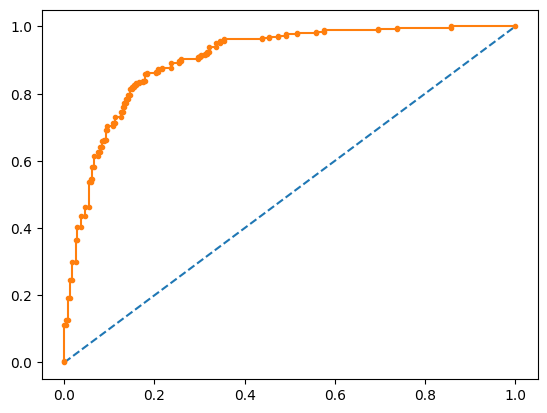

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.9027724358974359

## PR curve

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

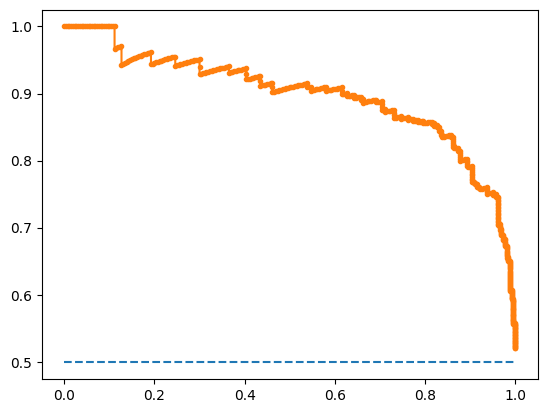

In [ ]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')

plt.plot(recall, precision, marker='.')
plt.show()

In [ ]:
AP = auc(recall, precision)
AP

0.897662372903334

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       240
           1       0.84      0.85      0.84       260

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

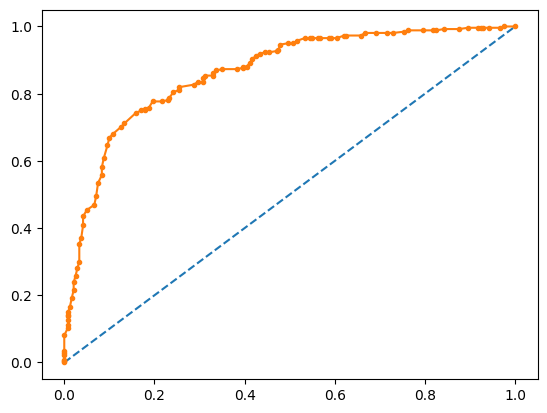

In [ ]:
model2 = KNeighborsClassifier(n_neighbors=250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

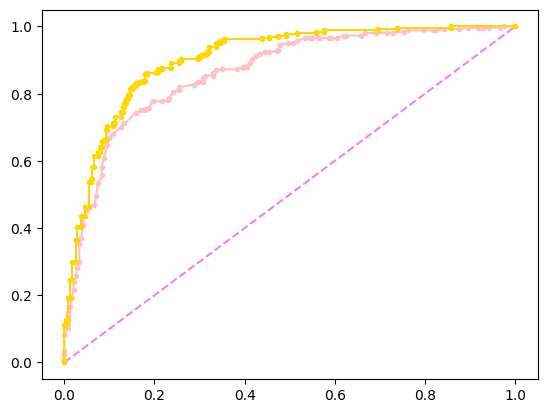

In [ ]:
model2 = KNeighborsClassifier(n_neighbors=250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
y_pred1_proba = model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])
fpr1, tpr1, _ = roc_curve(y_test, y_pred1_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--', color = 'violet')
plt.plot(fpr, tpr, marker='.', color = 'pink')
plt.plot(fpr1, tpr1, marker='.', color = 'gold')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred2_proba[:, 1])

0.8630608974358974

## Дизбаланс классов

In [ ]:
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)

In [ ]:
X

array([[-2.04582165, -0.13791624, -0.08071423, ...,  2.48194524,
         0.74236675,  0.23154789],
       [-0.98726024,  1.30120189,  2.37734888, ...,  0.55445754,
        -0.21892143, -0.37608578],
       [ 0.57335921,  0.09375582,  0.4662521 , ..., -0.6088508 ,
         0.79903499, -0.17121177],
       ...,
       [-0.57018255,  1.07650943,  0.58510456, ..., -1.51337602,
         0.90239871, -0.69230951],
       [ 2.37399549,  1.17319848, -1.94478665, ..., -0.32820676,
         1.5711921 ,  1.14877729],
       [-2.16769231, -2.54871672,  2.89359255, ...,  0.71535366,
         0.34329241,  1.07350284]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=490, Class1=10
Тестовая: Class0=495, Class1=5


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=492, Class1=8
Тестовая: Class0=493, Class1=7


In [ ]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [ ]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       493
           1       0.00      0.00      0.00         7

    accuracy                           0.98       500
   macro avg       0.49      0.50      0.50       500
weighted avg       0.97      0.98      0.98       500



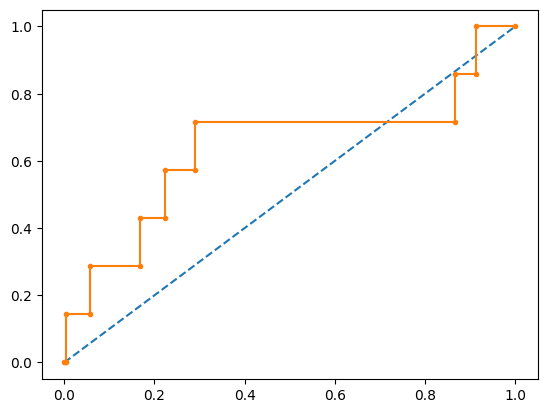

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.6398145465082584

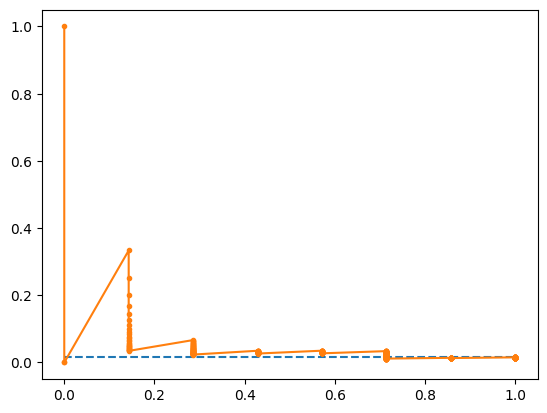

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [ ]:
auc(recall, precision)

0.04781664426527078

## Выбор значения порога по кривым

In [ ]:
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

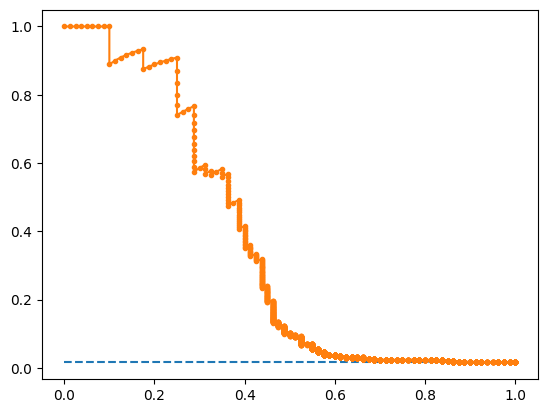

In [ ]:
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.show()

In [ ]:
auc(r, p)

0.36204139101114036

In [ ]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.92      0.15      0.26        80

    accuracy                           0.99      5000
   macro avg       0.95      0.57      0.63      5000
weighted avg       0.99      0.99      0.98      5000



In [ ]:
from numpy import argmax

In [ ]:
f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
pr_thresholds[ix]

0.15178528298332977

In [ ]:
print('Порог=%f, F-Score=%.3f' % (pr_thresholds[ix], f1[ix]))

Порог=0.151785, F-Score=0.443


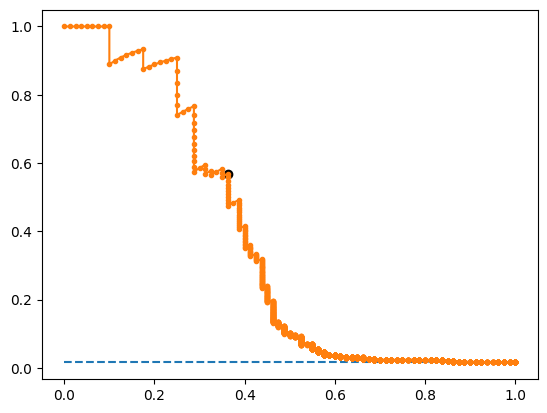

In [ ]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.show()

In [ ]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.56      0.35      0.43        80

    accuracy                           0.99      5000
   macro avg       0.77      0.67      0.71      5000
weighted avg       0.98      0.99      0.98      5000



# Задания для самостоятельного выполнения

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

1)Повторите анализ из лабораторной работы, но с двумерными датасетами. Изобразите графически, как изменение порога влияет на расположение границы принятия решений.

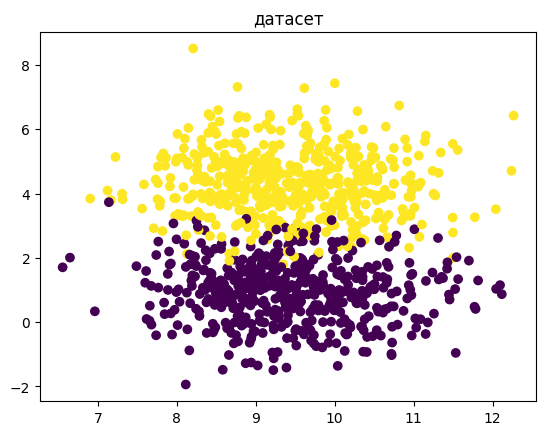

In [ ]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, shuffle=True, random_state=4)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('датасет')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

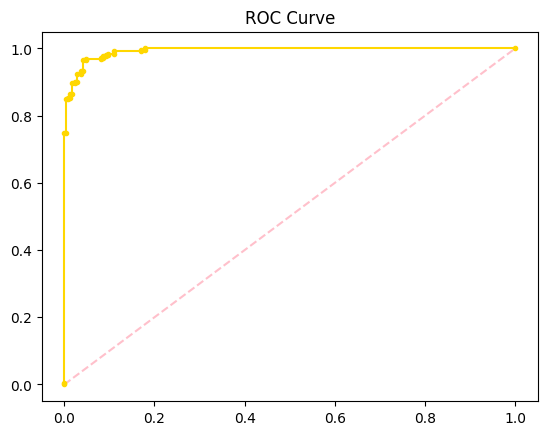

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--', color = 'pink')
plt.plot(fpr, tpr, marker='.', color = 'gold')
plt.title('ROC Curve')
plt.show()

In [ ]:
def draw_model(model, x, y, border=0.5):
    X0 = np.linspace(x[:, 0].min() - 1, x[:, 0].max() + 1, x.shape[0])
    X1 = np.linspace(x[:, 1].min() - 1, x[:, 1].max() + 1, x.shape[0])
    X0_grid, X1_grid = np.meshgrid(X0, X1)

    y_predict = (model.predict_proba(np.c_[X0_grid.ravel(), X1_grid.ravel()])[:, 1] > border).astype('int').reshape(X0_grid.shape)
    plt.pcolormesh(X0_grid, X1_grid, y_predict)

    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='black', linewidth=1)

    plt.title('разделение областей, логистическая регрессия')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

Порог 0.5


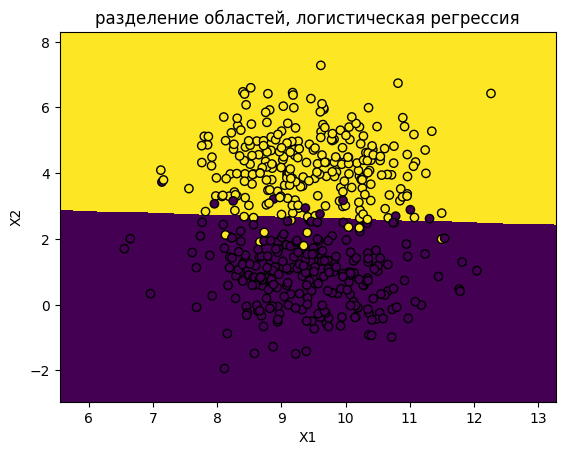

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       247
           1       0.96      0.95      0.96       253

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500

Порог 0.01


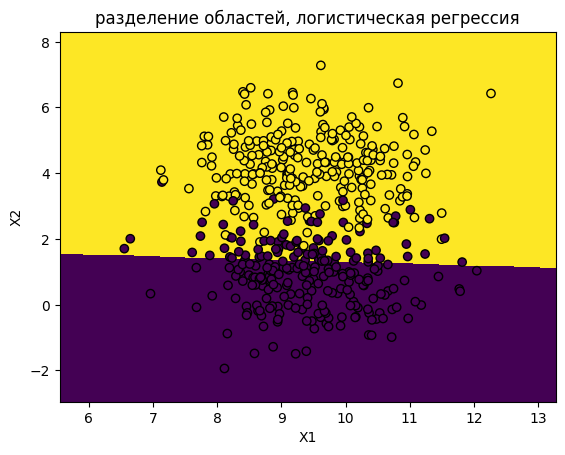

              precision    recall  f1-score   support

           0       1.00      0.65      0.79       247
           1       0.75      1.00      0.85       253

    accuracy                           0.83       500
   macro avg       0.87      0.83      0.82       500
weighted avg       0.87      0.83      0.82       500

Порог 0.99


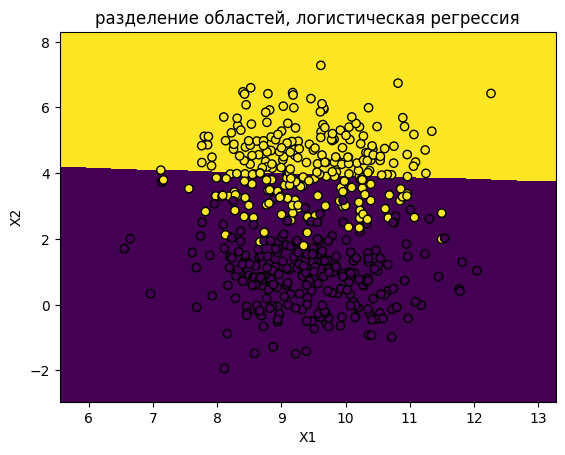

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       247
           1       1.00      0.60      0.75       253

    accuracy                           0.80       500
   macro avg       0.85      0.80      0.79       500
weighted avg       0.86      0.80      0.79       500



In [ ]:
print('Порог 0.5')
draw_model(model, X_test, y_test)
print(metrics.classification_report(y_test, model.predict(X_test)))

y_pred = (y_pred_proba[:, 1] > 0.01).astype('int')
print('Порог 0.01')
draw_model(model, X_test, y_test, 0.01)
print(metrics.classification_report(y_test, y_pred))

y_pred = (y_pred_proba[:, 1] > 0.99).astype('int')
print('Порог 0.99')
draw_model(model, X_test, y_test, 0.99)
print(metrics.classification_report(y_test, y_pred))

порог 0.5 - точность 0.96 - лучщий <br>
порог 0.01 - 0.83<br>
порог 0.99 - 0.80 - худший

2)Повторите анализ на реальном датасете для бинарной классификации. Проинтерпретируйте результат, сделайте вывод.

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
heart_data = fetch_openml(name="heart-disease", version=1, as_frame=True)
df = heart_data.frame

In [ ]:
y = (df['target'] != 0).astype(int) # 0 - нет заболевания, 1 - есть.
x = df.drop('target', axis=1)

In [ ]:
df.shape

(303, 14)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=10000).fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

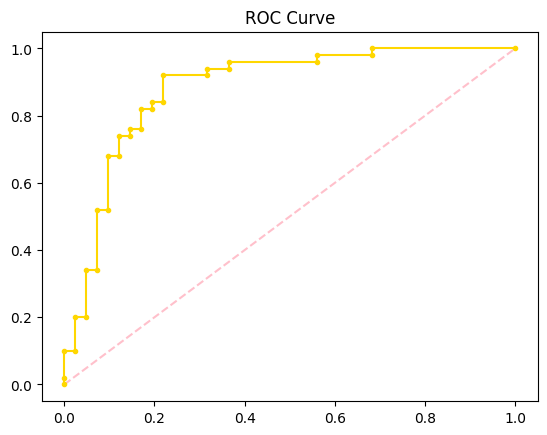

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--', color = 'pink')
plt.plot(fpr, tpr, marker='.', color = 'gold')
plt.title('ROC Curve')
plt.show()

In [ ]:
print("Порог 0.5")
print(metrics.classification_report(y_test, model.predict(X_test)))

y_pred = (y_pred_proba[:, 1] > 0.01).astype('int')
print("Порог 0.01")
print(metrics.classification_report(y_test, y_pred))

y_pred = (y_pred_proba[:, 1] > 0.99).astype('int')
print("Порог 0.99")
print(metrics.classification_report(y_test, y_pred))

Порог 0.5
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

Порог 0.01
              precision    recall  f1-score   support

           0       1.00      0.24      0.39        41
           1       0.62      1.00      0.76        50

    accuracy                           0.66        91
   macro avg       0.81      0.62      0.58        91
weighted avg       0.79      0.66      0.60        91

Порог 0.99
              precision    recall  f1-score   support

           0       0.45      1.00      0.62        41
           1       0.00      0.00      0.00        50

    accuracy                           0.45        91
   macro avg       0.23      0.50      0.31        91
weighted avg       0.20      0.45      0.2

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Для этого датасета я бы выбрала порог 0.01 т к необходимо не пропустить ни одного человека с заболеванием, а она справляется с этим отлично, но и часто определяет здоровых, как больных. поэтому если важно не давать ложные диагнозы, то порог 0.5 отлично подойдет, а порог 0.99 показал наихудшие результаты

3)В задании по оптимизации порога используйте ROC и среднее геометрическое между TPR и FPR как критерий оптимизации.

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba[:, 1])

In [ ]:
geometric_mean = np.sqrt(tpr * (1 - fpr))  # Среднее геометрическое TPR и (1 - FPR)
optimal_threshold_index = np.argmax(geometric_mean)
optimal_threshold = thresholds[optimal_threshold_index]
optimal_tpr = tpr[optimal_threshold_index]
optimal_fpr = fpr[optimal_threshold_index]

optimal_threshold, optimal_tpr, optimal_fpr

(0.31916651928924367, 0.92, 0.21951219512195122)

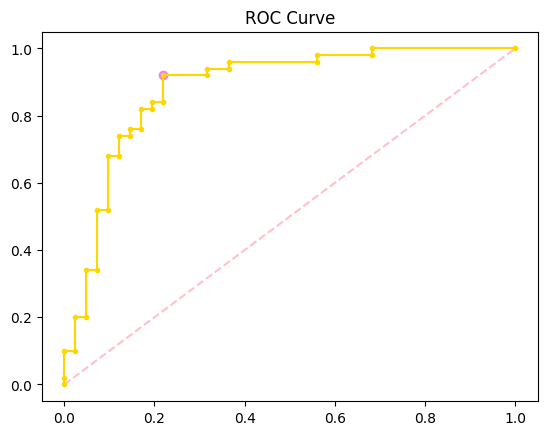

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--', color = 'pink')
plt.plot(fpr, tpr, marker='.', color = 'gold')
plt.scatter(optimal_fpr, optimal_tpr, color='violet')
plt.title('ROC Curve')
plt.show()

In [ ]:
y_pred_optimal = (y_pred_proba[:, 1] >= optimal_threshold).astype(int)
print(metrics.classification_report(y_test, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83        41
           1       0.84      0.92      0.88        50

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91



Да, можно заметить, что при оптимальном пороге метрики стали лучше, теперь она праильно классифицирует 86% пациентов

4)При оптимизации порога по PR-кривой используйте другую F-метрику - сначала с преимуществом precision, а затем - с превалированием recall. Изобразите получившиеся пороги на графике. Проанализируйте метрики получившихся моделей.

5)Постройте классификационные кривые для задачи множественной классификации. Проинтерпретируйте результат.

In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
wine = load_wine()
X = wine.data
y = wine.target

In [ ]:
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
classifier = OneVsRestClassifier(LogisticRegression(max_iter=10000))
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

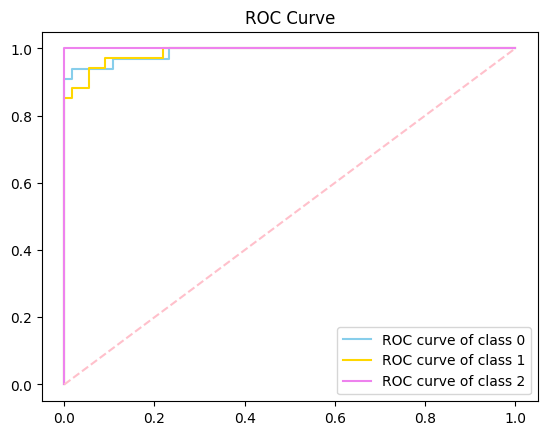

In [ ]:
plt.figure()

plt.plot(fpr[0], tpr[0], color='skyblue', label='ROC curve of class 0')
plt.plot(fpr[1], tpr[1], color='gold', label='ROC curve of class 1')
plt.plot(fpr[2], tpr[2], color='violet', label='ROC curve of class 2')

plt.plot([0, 1], [0, 1], linestyle='--', color = 'pink')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
for i in range(n_classes):
    y_pred = (y_score[:, i] > 0.5).astype(int)
    print(f'класс {i}:')
    print(classification_report(y_test[:, i], y_pred))

класс 0:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        56
           1       0.94      0.94      0.94        33

    accuracy                           0.96        89
   macro avg       0.95      0.95      0.95        89
weighted avg       0.96      0.96      0.96        89

класс 1:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        55
           1       0.91      0.91      0.91        34

    accuracy                           0.93        89
   macro avg       0.93      0.93      0.93        89
weighted avg       0.93      0.93      0.93        89

класс 2:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.96      1.00      0.98        22

    accuracy                           0.99        89
   macro avg       0.98      0.99      0.99        89
weighted avg       0.99      0.99      0.99    

У каждого класса хорошее качество, но 2 класс показывает практически идеальные результаты

6)Используйте для построения кривых библиотеку yellowbrick.

In [ ]:
from yellowbrick.classifier import ROCAUC